In [1]:
import numpy as np

from lib.io import load_stream
from lib.metrics import label_uphill_downhill, time_weighted_avg

user_id = '4a674085-61a1-4f39-83a6-c00d6870bf6b'
activity_id = 16399512670

In [2]:
data = load_stream(activity_id, user_id)

In [3]:
data = label_uphill_downhill(data)

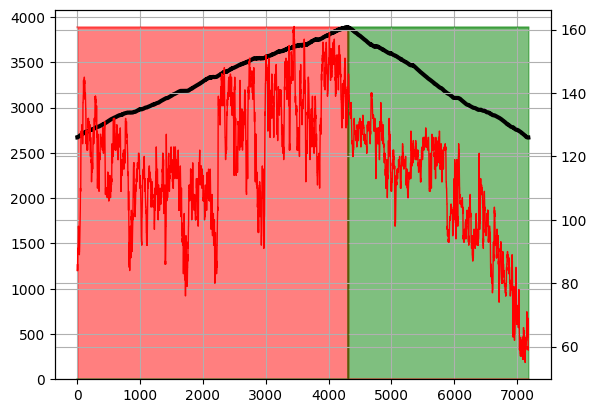

In [19]:
ax = ((data['segment'] == 'uphill').astype(int)*np.max(data['altitude'])).plot(kind='area', color='red', alpha=0.5)
ax = ((data['segment'] == 'downhill').astype(int)*np.max(data['altitude'])).plot(kind='area', color='green', alpha=0.5)
data['altitude'].plot(ax=ax, color='k', linewidth=3, grid=True)
data['heartrate'].plot(ax=ax.twinx(), color='r',linewidth=1, grid=True);

In [20]:
def time_weighted_avg(data, xfield):
    dt = data['time'].diff().fillna(0)
    numer = (dt * data[xfield]).sum()
    denom = dt.sum()
    return numer / denom

In [16]:
time_weighted_avg(data,"heartrate")

np.float64(115.13481598110609)